# Label propagation

In [1]:
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import os

In [2]:
test_images = [
        "C:/Users/User/Desktop/UDG_old_pc/UDG/Subjects/MISSSSSA/Atlas_part2/test-set/testing-images/1003.nii.gz",
        "C:/Users/User/Desktop/UDG_old_pc/UDG/Subjects/MISSSSSA/Atlas_part2/test-set/testing-images/1004.nii.gz",
        "C:/Users/User/Desktop/UDG_old_pc/UDG/Subjects/MISSSSSA/Atlas_part2/test-set/testing-images/1005.nii.gz",
        "C:/Users/User/Desktop/UDG_old_pc/UDG/Subjects/MISSSSSA/Atlas_part2/test-set/testing-images/1018.nii.gz",
        "C:/Users/User/Desktop/UDG_old_pc/UDG/Subjects/MISSSSSA/Atlas_part2/test-set/testing-images/1019.nii.gz",
        "C:/Users/User/Desktop/UDG_old_pc/UDG/Subjects/MISSSSSA/Atlas_part2/test-set/testing-images/1023.nii.gz",
        "C:/Users/User/Desktop/UDG_old_pc/UDG/Subjects/MISSSSSA/Atlas_part2/test-set/testing-images/1024.nii.gz",
        "C:/Users/User/Desktop/UDG_old_pc/UDG/Subjects/MISSSSSA/Atlas_part2/test-set/testing-images/1025.nii.gz",
        "C:/Users/User/Desktop/UDG_old_pc/UDG/Subjects/MISSSSSA/Atlas_part2/test-set/testing-images/1038.nii.gz",
        "C:/Users/User/Desktop/UDG_old_pc/UDG/Subjects/MISSSSSA/Atlas_part2/test-set/testing-images/1039.nii.gz",
        "C:/Users/User/Desktop/UDG_old_pc/UDG/Subjects/MISSSSSA/Atlas_part2/test-set/testing-images/1101.nii.gz",
        "C:/Users/User/Desktop/UDG_old_pc/UDG/Subjects/MISSSSSA/Atlas_part2/test-set/testing-images/1104.nii.gz",
        "C:/Users/User/Desktop/UDG_old_pc/UDG/Subjects/MISSSSSA/Atlas_part2/test-set/testing-images/1107.nii.gz",
        "C:/Users/User/Desktop/UDG_old_pc/UDG/Subjects/MISSSSSA/Atlas_part2/test-set/testing-images/1110.nii.gz",
        "C:/Users/User/Desktop/UDG_old_pc/UDG/Subjects/MISSSSSA/Atlas_part2/test-set/testing-images/1113.nii.gz",
        "C:/Users/User/Desktop/UDG_old_pc/UDG/Subjects/MISSSSSA/Atlas_part2/test-set/testing-images/1116.nii.gz",
        "C:/Users/User/Desktop/UDG_old_pc/UDG/Subjects/MISSSSSA/Atlas_part2/test-set/testing-images/1119.nii.gz",
        "C:/Users/User/Desktop/UDG_old_pc/UDG/Subjects/MISSSSSA/Atlas_part2/test-set/testing-images/1122.nii.gz",
        "C:/Users/User/Desktop/UDG_old_pc/UDG/Subjects/MISSSSSA/Atlas_part2/test-set/testing-images/1125.nii.gz",
        "C:/Users/User/Desktop/UDG_old_pc/UDG/Subjects/MISSSSSA/Atlas_part2/test-set/testing-images/1128.nii.gz"
    ]

In [3]:
def load_image(image_path):
    # Load the image using nibabel
    image = nib.load(image_path)
    data = image.get_fdata()
    return data, image.affine

def create_label_image(csf_map, wm_map, gm_map):
    label_image = np.zeros(csf_map.shape, dtype=np.int32)
    label_image[(csf_map > wm_map) & (csf_map > gm_map)] = 1  # CSF
    label_image[(wm_map > csf_map) & (wm_map > gm_map)] = 2   # WM
    label_image[(gm_map > csf_map) & (gm_map > wm_map)] = 3   # GM
    return label_image

def save_label_image(label_image, affine, output_path):
    label_nifti = nib.Nifti1Image(label_image, affine)
    nib.save(label_nifti, output_path)

def dice_score(segmentation, ground_truth, label):
    """
    Calculate Dice score for a specific label.
    
    :param segmentation: Numpy array of the segmented image
    :param ground_truth: Numpy array of the ground truth image
    :param label: Label for the tissue (e.g., 1 for CSF, 2 for GM, 3 for WM)
    :return: Dice score for the specified label
    """
    seg = (segmentation == label)
    gt = (ground_truth == label)
    
    intersection = np.sum(seg * gt)
    total = np.sum(seg) + np.sum(gt)
    
    if total == 0:
        # To handle cases where both segmentations do not contain this label
        return 1.0 if intersection == 0 else 0.0
    
    dice = (2. * intersection) / total
    return dice

def compute_dice_scores(segmentation_path, ground_truth_path):
    """
    Compute Dice scores for each label and the average Dice score.
    
    :param segmentation_path: Path to the segmented NIfTI image
    :param ground_truth_path: Path to the ground truth NIfTI image
    :return: Dictionary with Dice scores for each label and the average Dice score
    """
    # Load images
    segmentation_img = nib.load(segmentation_path)
    ground_truth_img = nib.load(ground_truth_path)
    
    # Convert to numpy arrays
    segmentation = segmentation_img.get_fdata().astype(int)
    ground_truth = ground_truth_img.get_fdata().astype(int)
    
    # Calculate Dice score for each label
    labels = [1, 2, 3]  # Assuming labels are 1, 2, 3 for CSF, GM, WM
    label_val = {1:"CSF", 2:"WM", 3:"GM"}
    dice_scores = {f'Dice_label_{label_val[label]}': dice_score(segmentation, ground_truth, label) for label in labels}
    
    # Calculate average Dice score
    dice_scores['Average_Dice'] = np.mean(list(dice_scores.values()))
    
    return segmentation, ground_truth, dice_scores

# With Rigid transformations

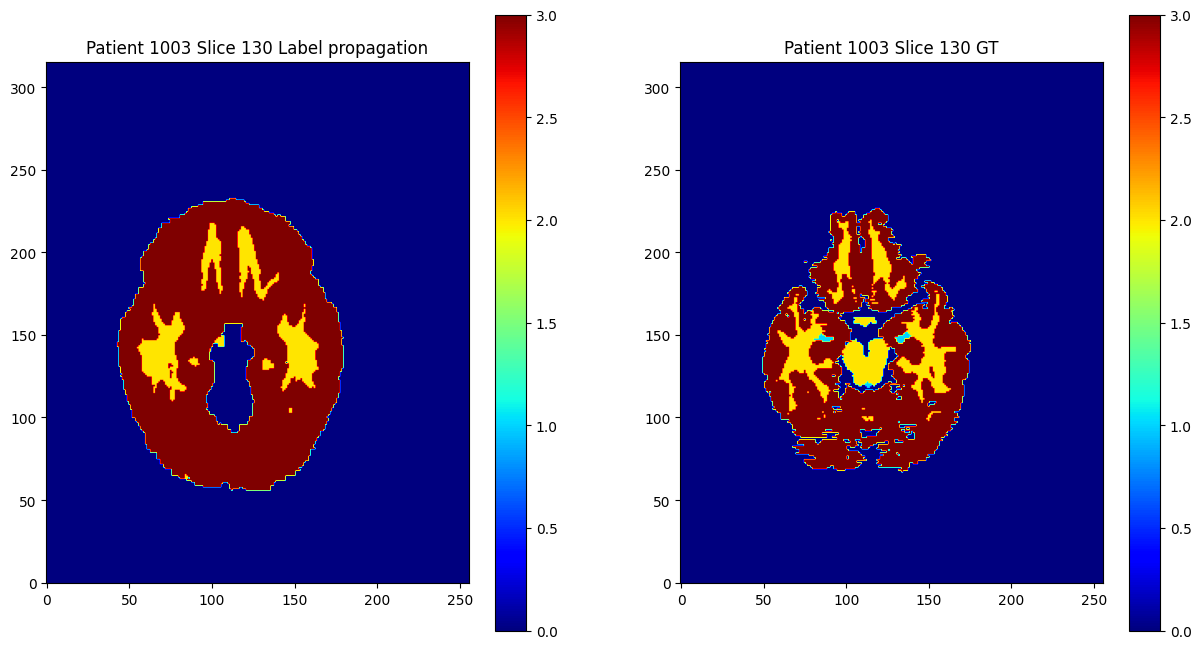

Patient 1003 Dice_label_CSF: 0.4232
Patient 1003 Dice_label_WM: 0.6782
Patient 1003 Dice_label_GM: 0.6048
Patient 1003 Average_Dice: 0.5687




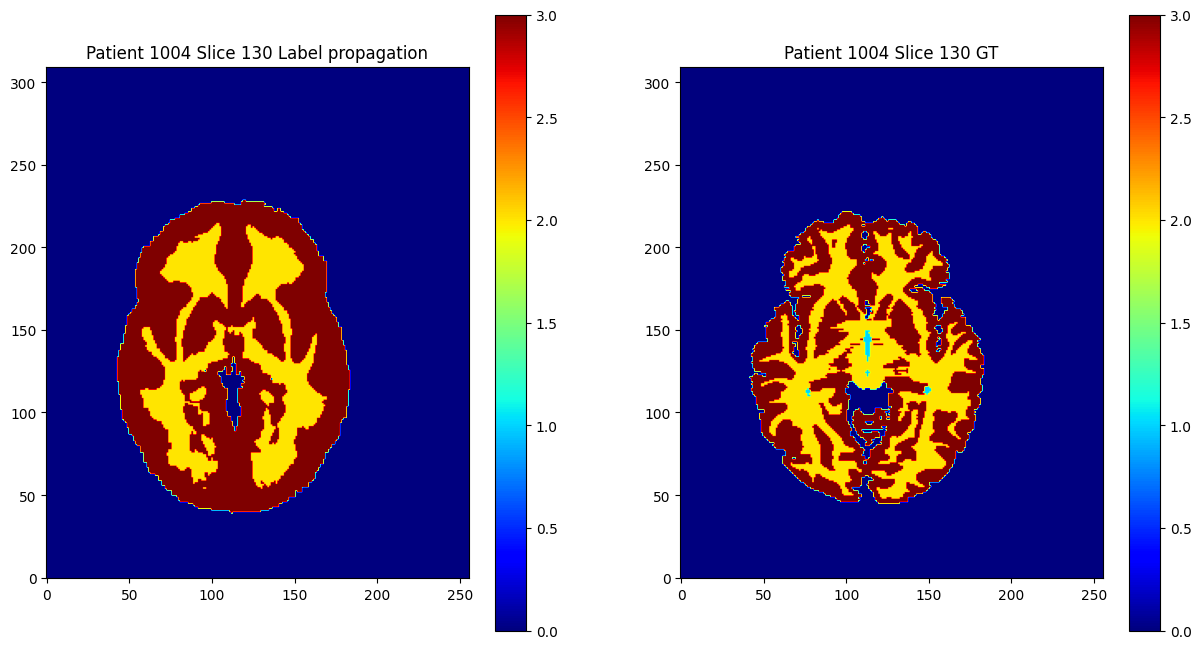

Patient 1004 Dice_label_CSF: 0.5260
Patient 1004 Dice_label_WM: 0.6474
Patient 1004 Dice_label_GM: 0.6269
Patient 1004 Average_Dice: 0.6001




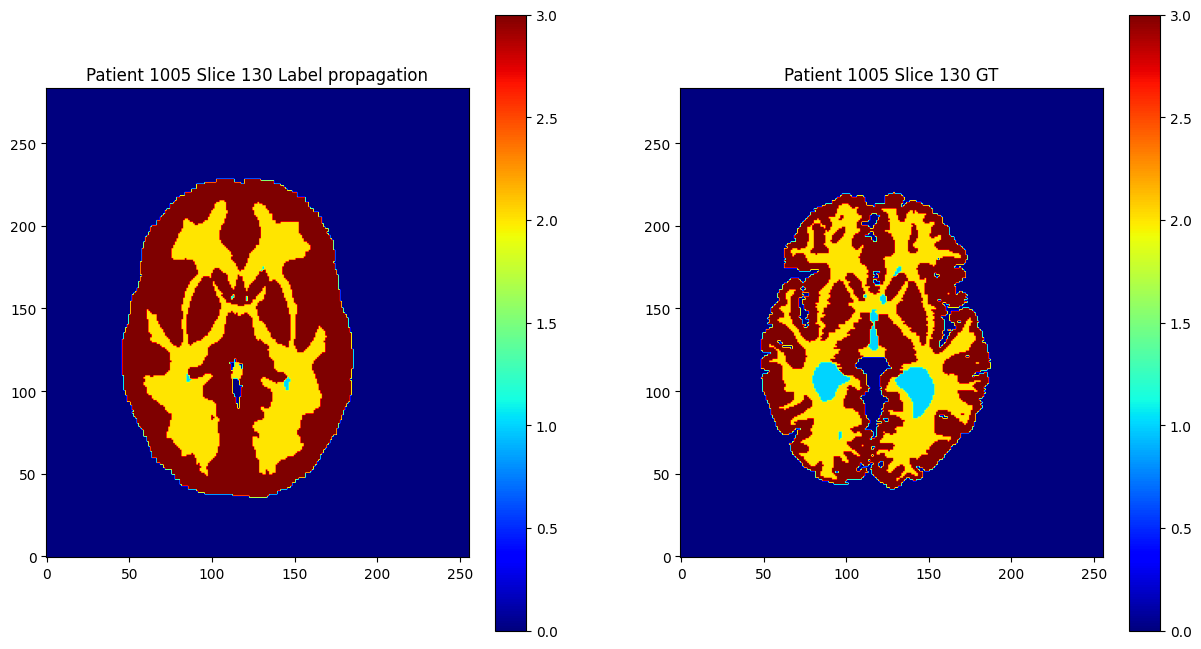

Patient 1005 Dice_label_CSF: 0.3902
Patient 1005 Dice_label_WM: 0.6171
Patient 1005 Dice_label_GM: 0.5784
Patient 1005 Average_Dice: 0.5286




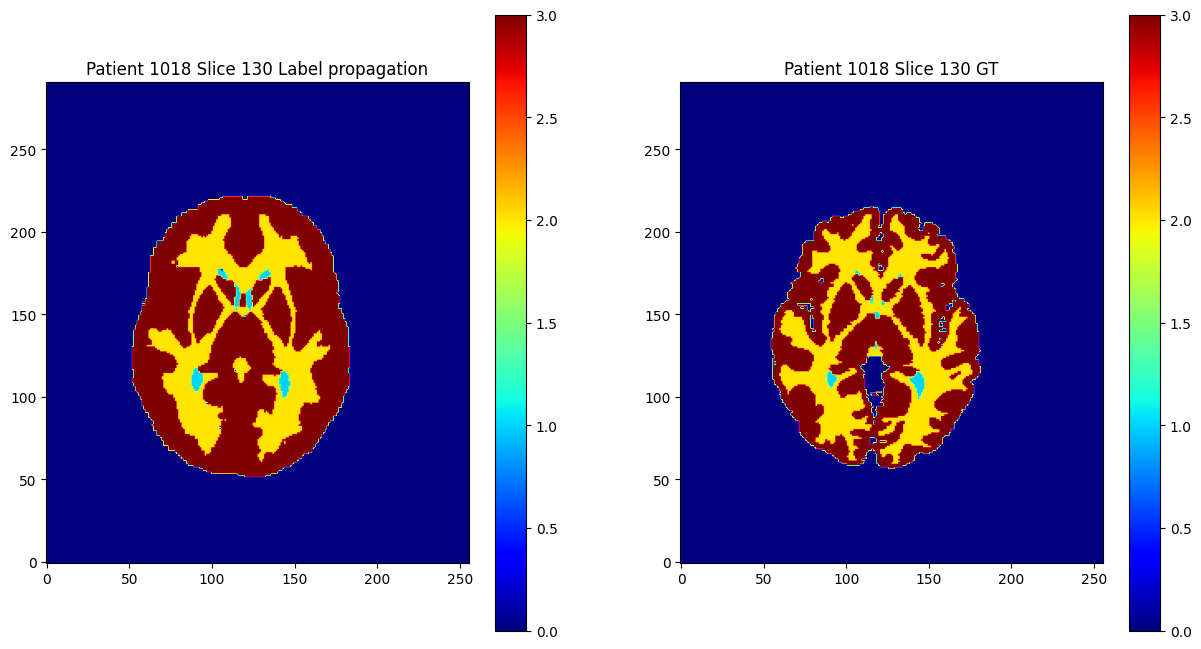

Patient 1018 Dice_label_CSF: 0.6834
Patient 1018 Dice_label_WM: 0.6644
Patient 1018 Dice_label_GM: 0.6041
Patient 1018 Average_Dice: 0.6506




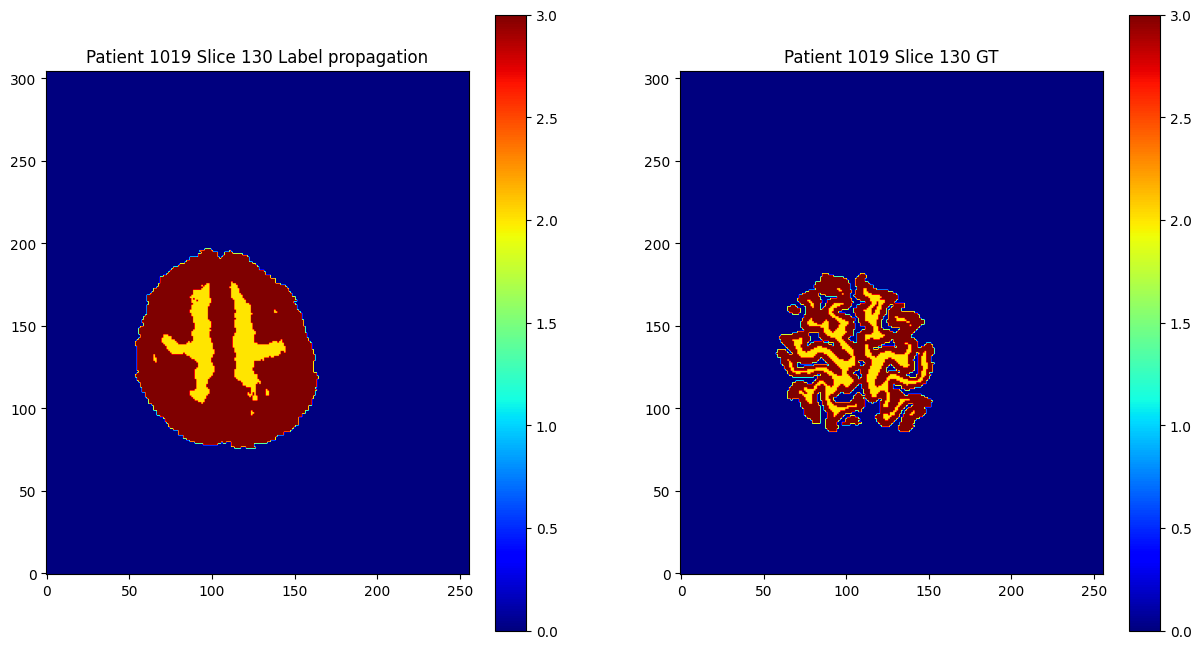

Patient 1019 Dice_label_CSF: 0.3860
Patient 1019 Dice_label_WM: 0.6163
Patient 1019 Dice_label_GM: 0.5800
Patient 1019 Average_Dice: 0.5274




KeyboardInterrupt: 

In [4]:


for f in test_images:
    num = f.split("/")[-1].split(".")[0]
    test_image_path = fr"C:\Users\User\Desktop\UDG_old_pc\UDG\Subjects\MISSSSSA\Atlas_part2\test-set\testing-images\{num}.nii.gz".replace("\\","/")
    csf_prob_map_path = fr"C:\Users\User\Desktop\UDG_old_pc\UDG\Subjects\MISSSSSA\Atlas_part2\Code\Outputs_MNI\MapsRigid\{num}.nii\CSF_final_transformed_{num}.nii.nii".replace("\\","/")
    wm_prob_map_path = fr"C:\Users\User\Desktop\UDG_old_pc\UDG\Subjects\MISSSSSA\Atlas_part2\Code\Outputs_MNI\MapsRigid\{num}.nii\WM_final_transformed_{num}.nii.nii".replace("\\","/")
    gm_prob_map_path = fr"C:\Users\User\Desktop\UDG_old_pc\UDG\Subjects\MISSSSSA\Atlas_part2\Code\Outputs_MNI\MapsRigid\{num}.nii\GM_final_transformed_{num}.nii.nii".replace("\\","/")

    #Load test image
    test_image, affine = load_image(test_image_path)

    #Prob maps
    csf_prob_map, _ = load_image(csf_prob_map_path)
    wm_prob_map, _ = load_image(wm_prob_map_path)
    gm_prob_map, _ = load_image(gm_prob_map_path)

    label_image = create_label_image(csf_prob_map, wm_prob_map, gm_prob_map).astype(np.float32)
    output_path = fr"C:\Users\User\Desktop\UDG_old_pc\UDG\Subjects\MISSSSSA\Atlas_part2\Code\Label_prop\Label_prop_{num}".replace("\\", "/")
    #save_label_image(label_image, affine, output_path)

    segmentation_path = fr"C:\Users\User\Desktop\UDG_old_pc\UDG\Subjects\MISSSSSA\Atlas_part2\Code\Label_prop\Label_prop_{num}.nii".replace("\\", "/")
    ground_truth_path = fr"C:\Users\User\Desktop\UDG_old_pc\UDG\Subjects\MISSSSSA\Atlas_part2\test-set\testing-labels\{num}_3C.nii.gz".replace("\\", "/")

    # Compute Dice scores
    segmentation_labels, gt_labels, dice_scores = compute_dice_scores(segmentation_path, ground_truth_path)

    slice_num = 130  # Taking a middle slice
    slice_data_labels = segmentation_labels[:, :, slice_num]
    slice_data_gt = gt_labels[:, :, slice_num]

    # Plot the slice
    plt.figure(figsize=(15, 8))
    plt.subplot(1,2,1)
    plt.imshow(slice_data_labels.T, cmap='jet', origin='lower')
    plt.colorbar()
    plt.title(f'Patient {num} Slice {slice_num} Label propagation')

    plt.subplot(1,2,2)
    plt.imshow(slice_data_gt.T, cmap='jet', origin='lower')
    plt.colorbar()
    plt.title(f'Patient {num} Slice {slice_num} GT')
    plt.show()
    # Print Dice scores
    for label, score in dice_scores.items():
        print(f'Patient {num} {label}: {score:.4f}')  
    
    print("\n")

# With NonRigid

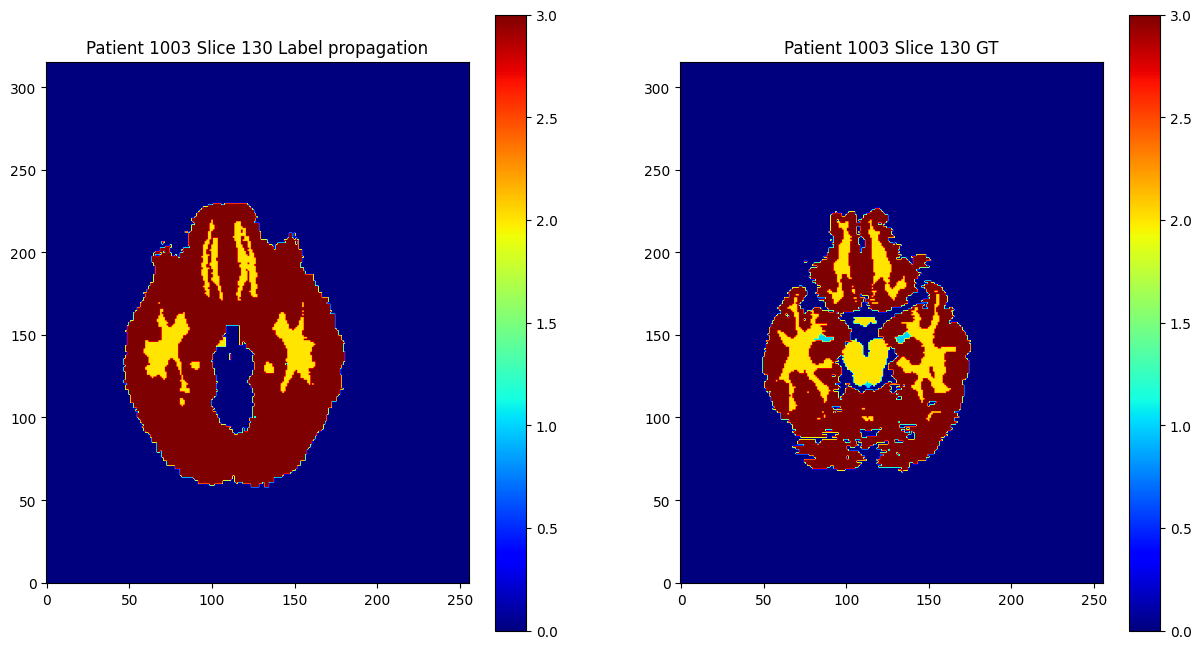

Patient 1003 Dice_label_CSF: 0.4549
Patient 1003 Dice_label_WM: 0.7085
Patient 1003 Dice_label_GM: 0.6749
Patient 1003 Average_Dice: 0.6128




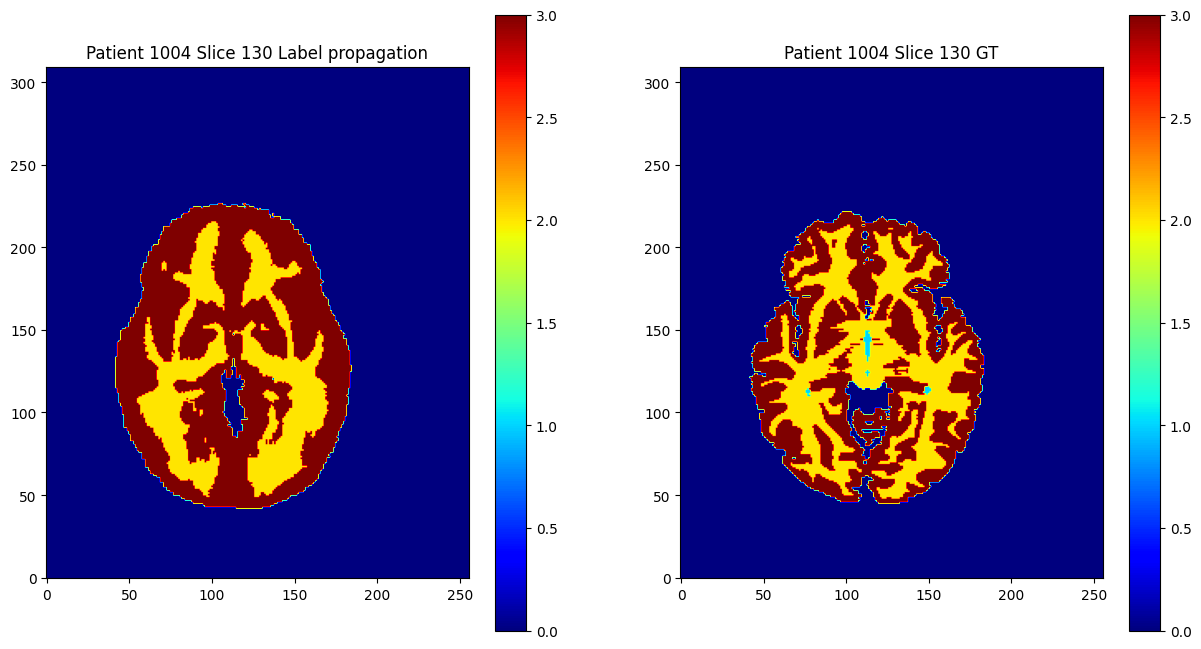

Patient 1004 Dice_label_CSF: 0.6842
Patient 1004 Dice_label_WM: 0.7070
Patient 1004 Dice_label_GM: 0.6590
Patient 1004 Average_Dice: 0.6834




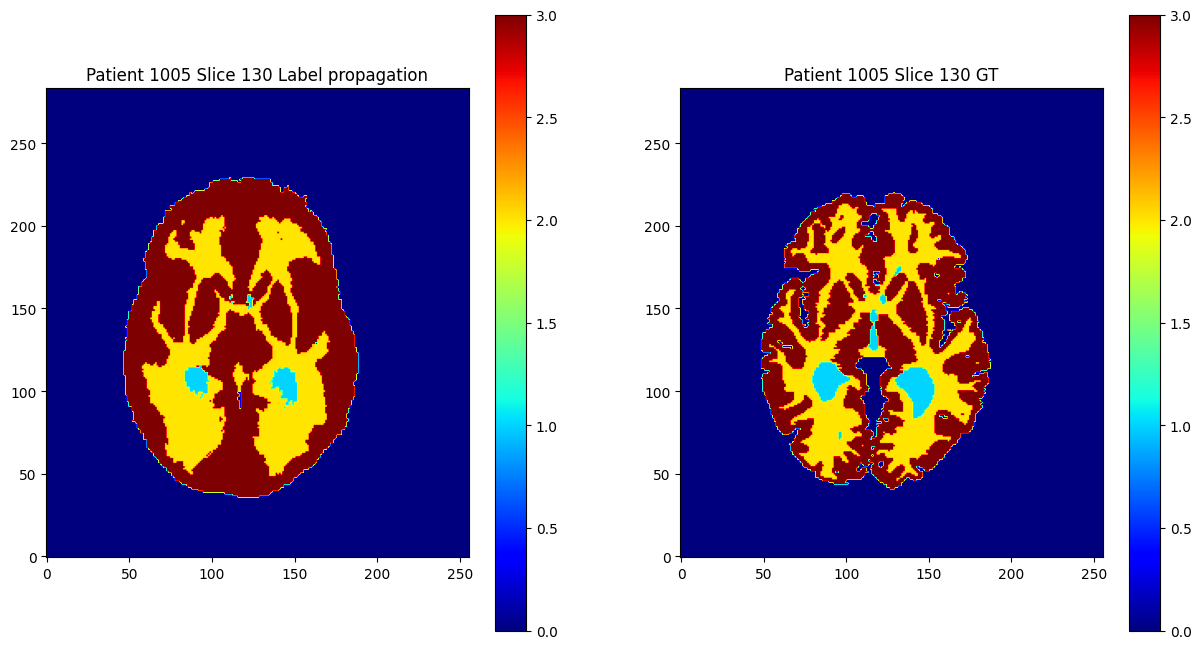

Patient 1005 Dice_label_CSF: 0.7560
Patient 1005 Dice_label_WM: 0.6763
Patient 1005 Dice_label_GM: 0.6348
Patient 1005 Average_Dice: 0.6890




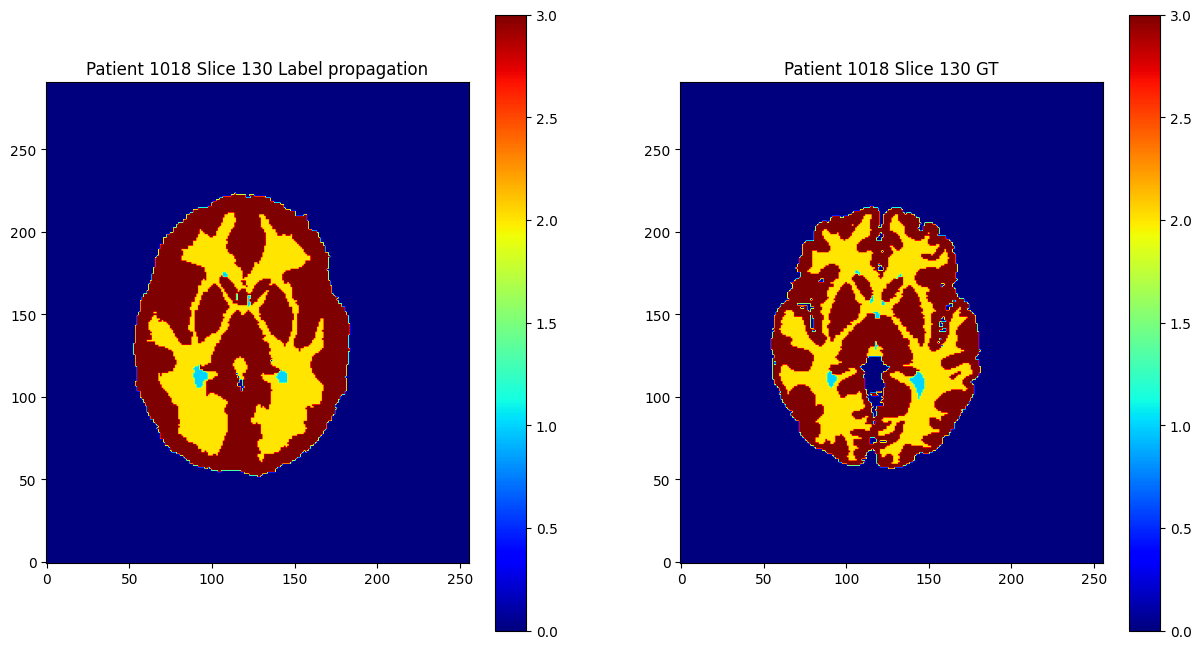

Patient 1018 Dice_label_CSF: 0.6895
Patient 1018 Dice_label_WM: 0.7036
Patient 1018 Dice_label_GM: 0.6676
Patient 1018 Average_Dice: 0.6869




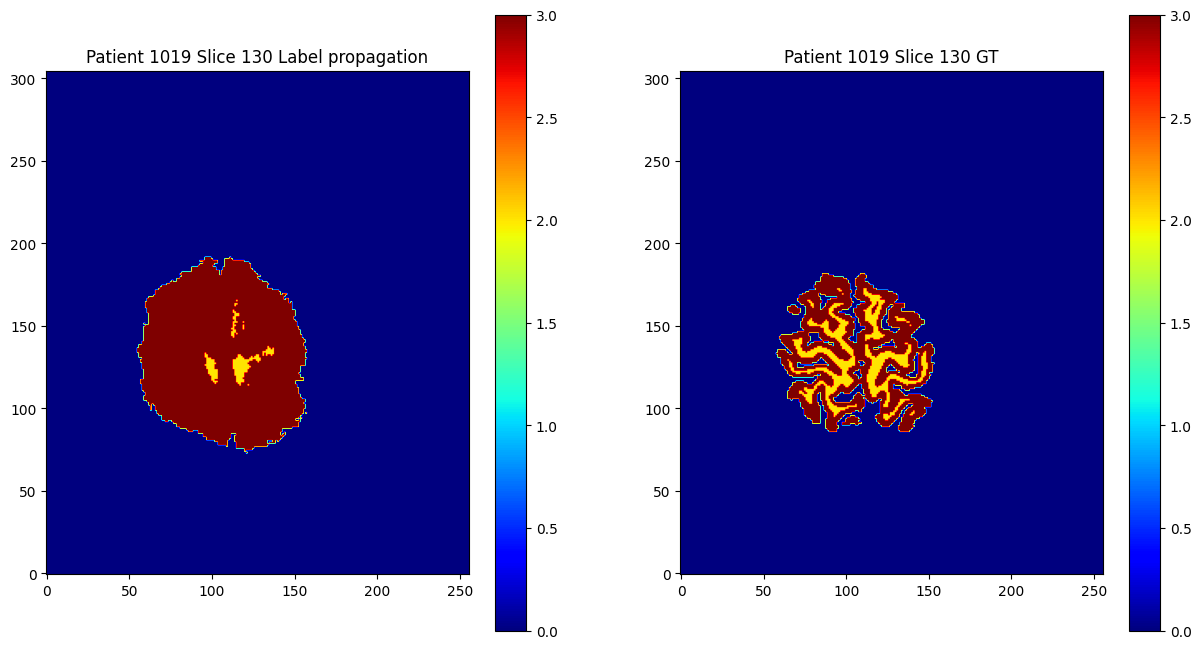

Patient 1019 Dice_label_CSF: 0.5317
Patient 1019 Dice_label_WM: 0.6784
Patient 1019 Dice_label_GM: 0.6548
Patient 1019 Average_Dice: 0.6217




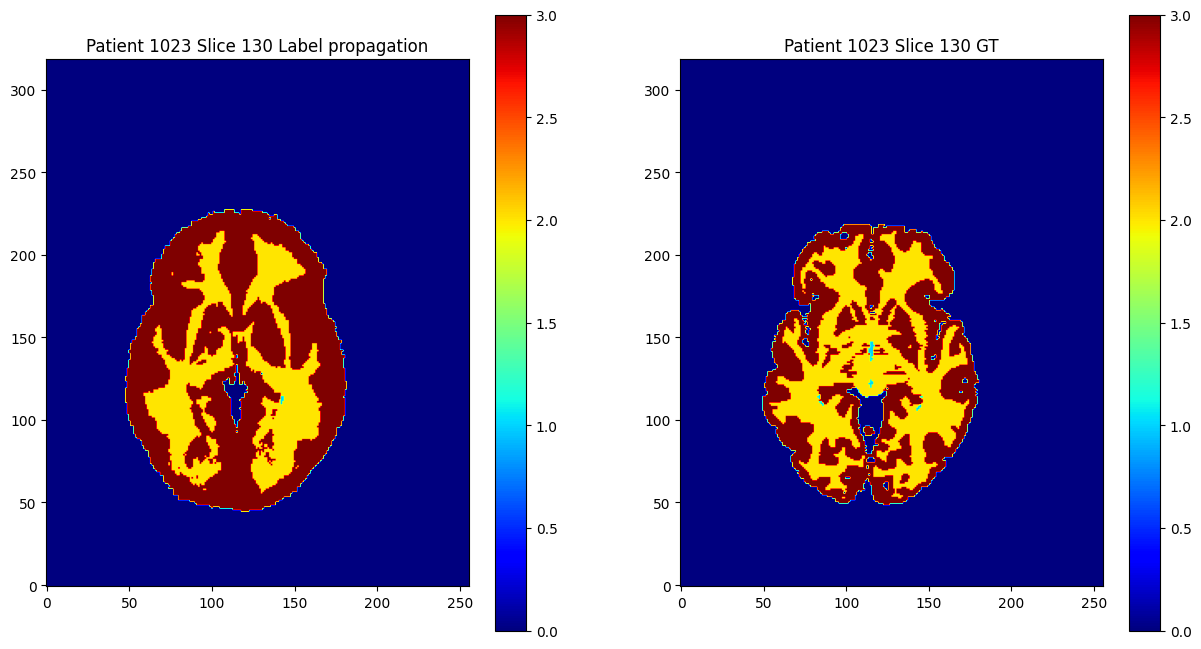

Patient 1023 Dice_label_CSF: 0.4687
Patient 1023 Dice_label_WM: 0.7035
Patient 1023 Dice_label_GM: 0.6561
Patient 1023 Average_Dice: 0.6094




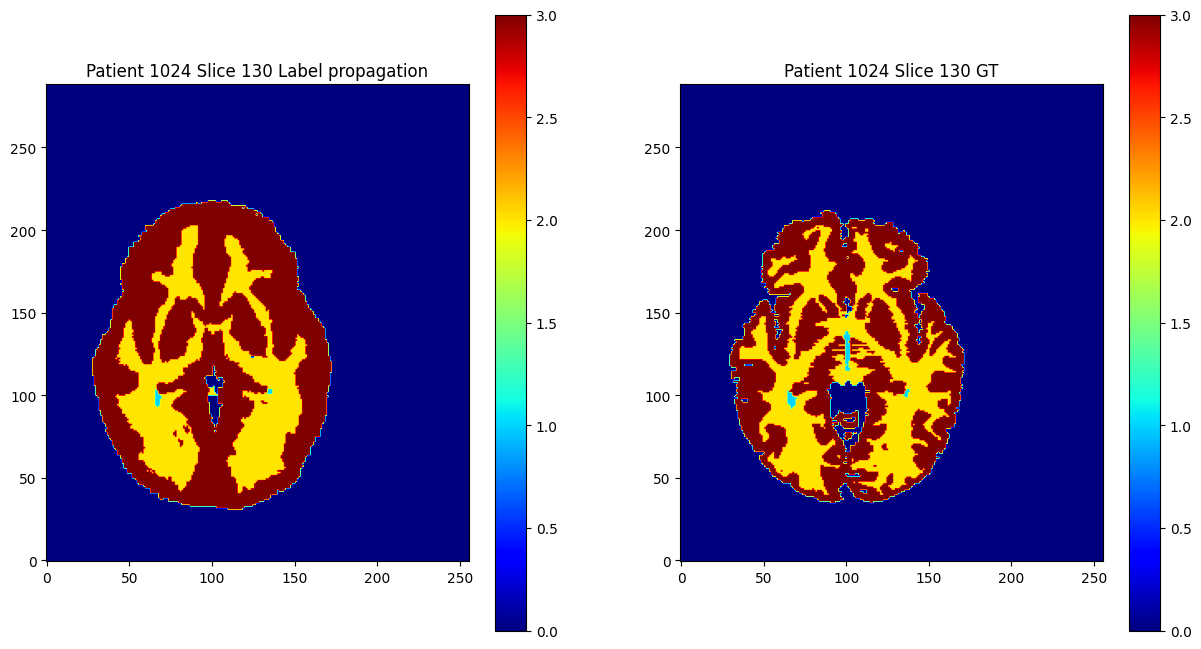

Patient 1024 Dice_label_CSF: 0.6454
Patient 1024 Dice_label_WM: 0.7080
Patient 1024 Dice_label_GM: 0.6955
Patient 1024 Average_Dice: 0.6830




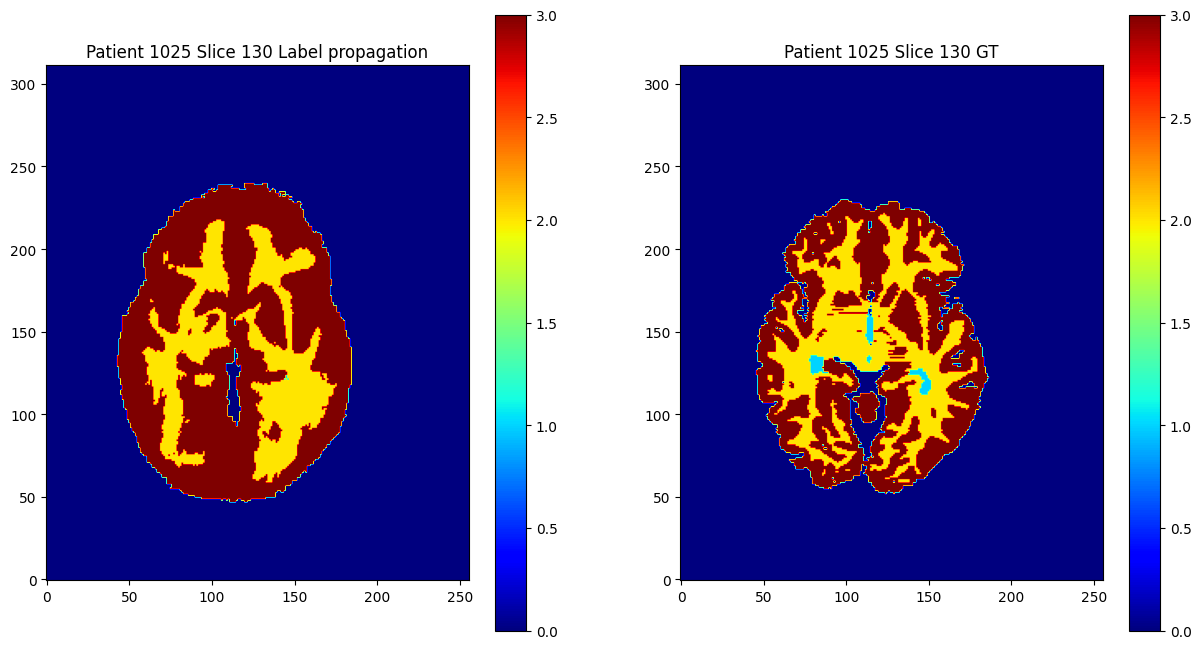

Patient 1025 Dice_label_CSF: 0.7397
Patient 1025 Dice_label_WM: 0.6800
Patient 1025 Dice_label_GM: 0.6515
Patient 1025 Average_Dice: 0.6904




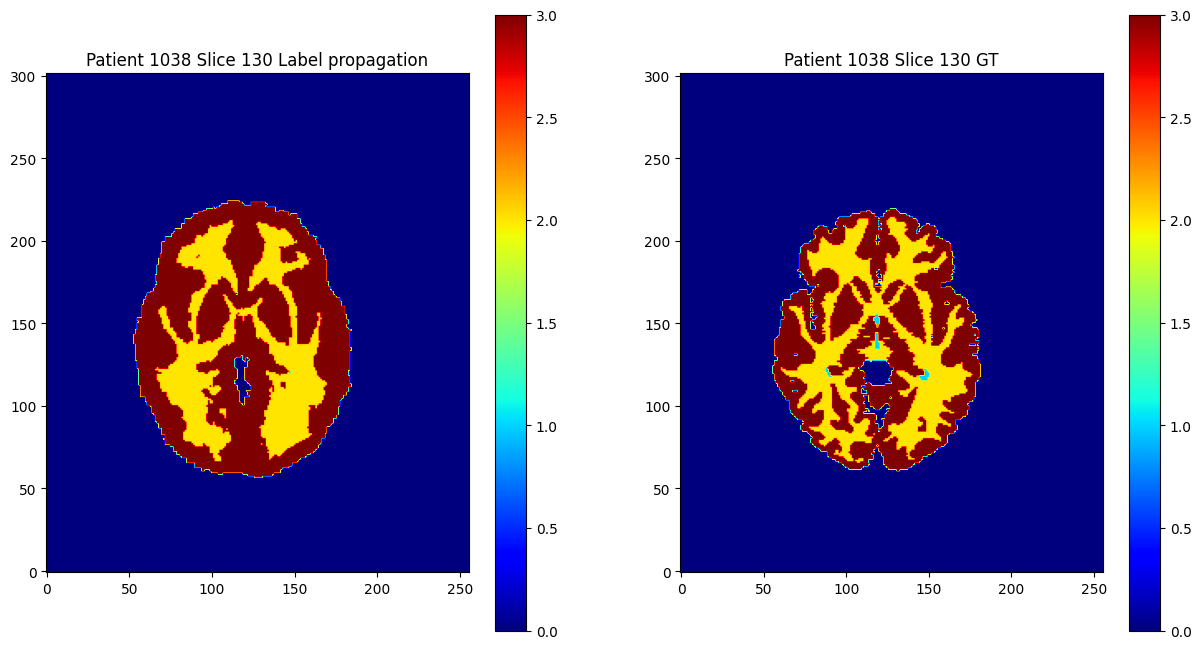

Patient 1038 Dice_label_CSF: 0.7103
Patient 1038 Dice_label_WM: 0.7015
Patient 1038 Dice_label_GM: 0.6628
Patient 1038 Average_Dice: 0.6915




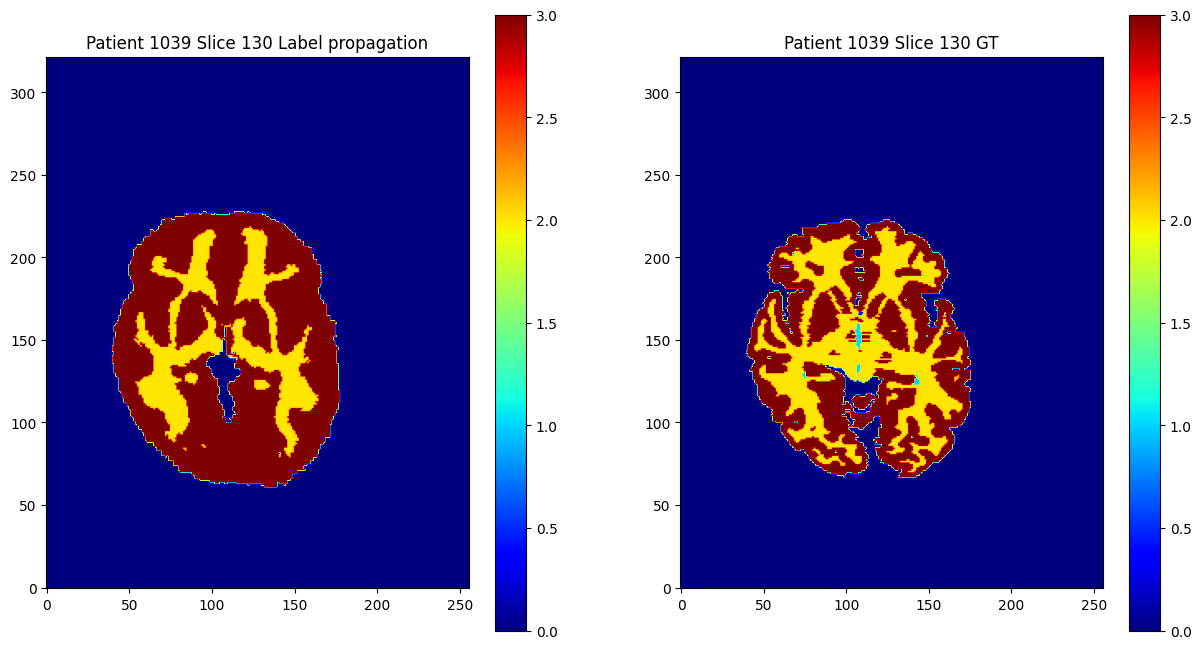

Patient 1039 Dice_label_CSF: 0.5773
Patient 1039 Dice_label_WM: 0.6697
Patient 1039 Dice_label_GM: 0.6288
Patient 1039 Average_Dice: 0.6253




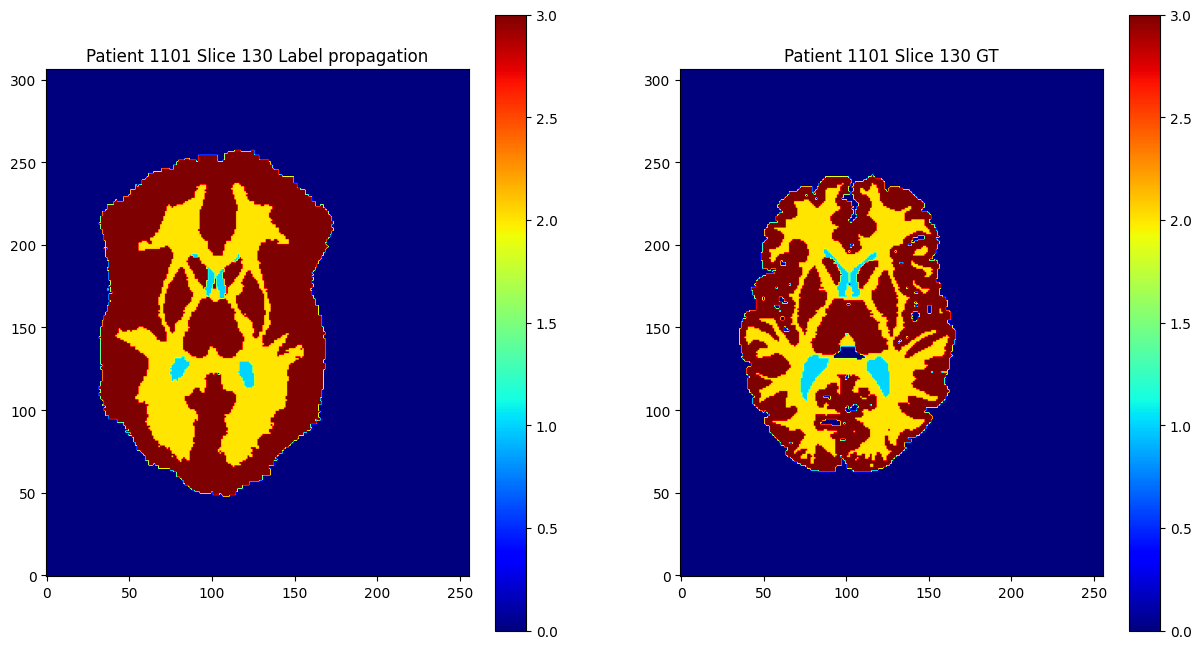

Patient 1101 Dice_label_CSF: 0.6776
Patient 1101 Dice_label_WM: 0.7065
Patient 1101 Dice_label_GM: 0.5113
Patient 1101 Average_Dice: 0.6318




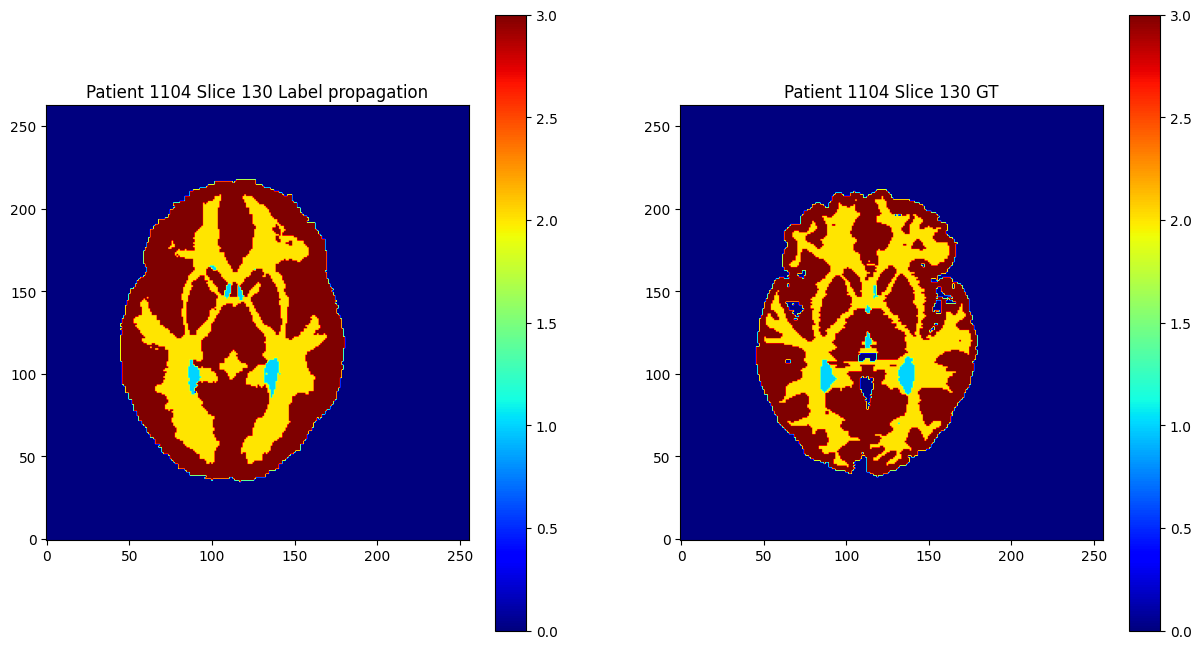

Patient 1104 Dice_label_CSF: 0.7170
Patient 1104 Dice_label_WM: 0.6932
Patient 1104 Dice_label_GM: 0.6381
Patient 1104 Average_Dice: 0.6828




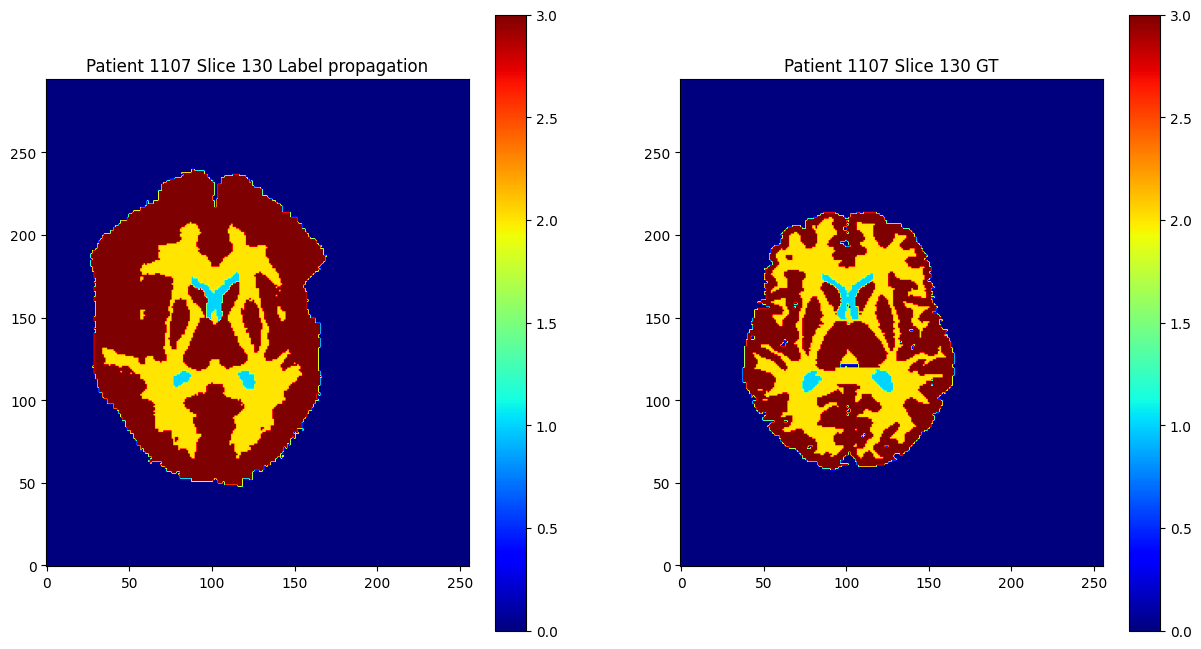

Patient 1107 Dice_label_CSF: 0.6499
Patient 1107 Dice_label_WM: 0.7143
Patient 1107 Dice_label_GM: 0.5601
Patient 1107 Average_Dice: 0.6414




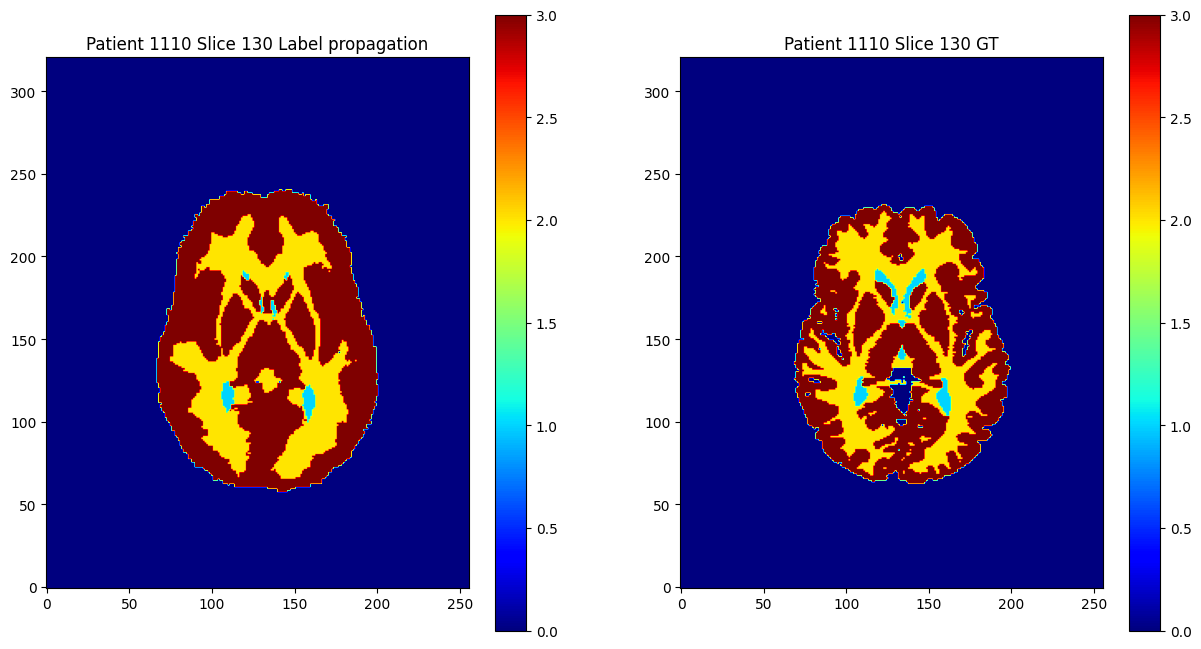

Patient 1110 Dice_label_CSF: 0.7265
Patient 1110 Dice_label_WM: 0.7019
Patient 1110 Dice_label_GM: 0.6435
Patient 1110 Average_Dice: 0.6906




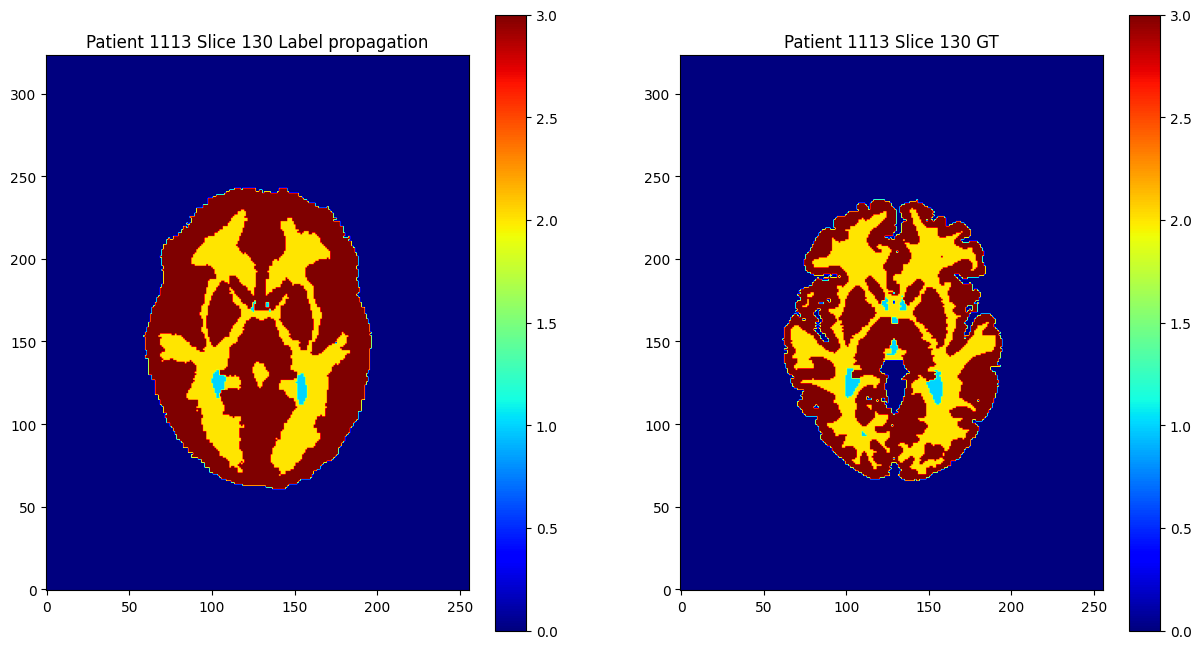

Patient 1113 Dice_label_CSF: 0.7336
Patient 1113 Dice_label_WM: 0.7032
Patient 1113 Dice_label_GM: 0.6287
Patient 1113 Average_Dice: 0.6885




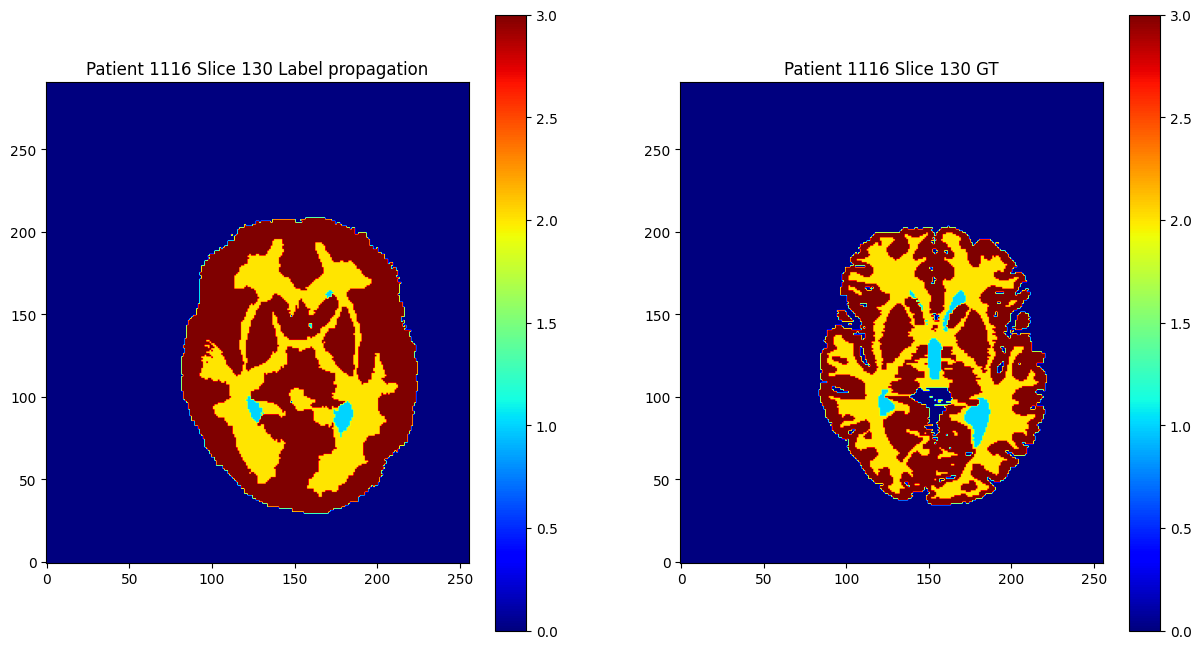

Patient 1116 Dice_label_CSF: 0.7274
Patient 1116 Dice_label_WM: 0.6501
Patient 1116 Dice_label_GM: 0.6596
Patient 1116 Average_Dice: 0.6790




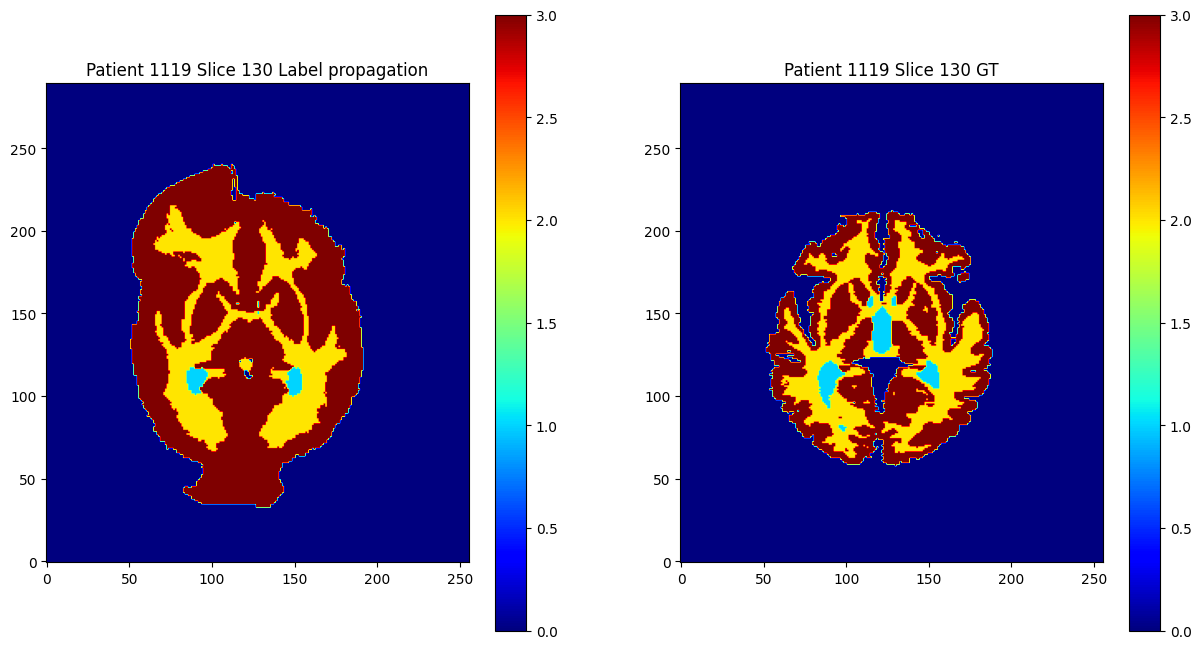

Patient 1119 Dice_label_CSF: 0.7567
Patient 1119 Dice_label_WM: 0.6882
Patient 1119 Dice_label_GM: 0.5615
Patient 1119 Average_Dice: 0.6688




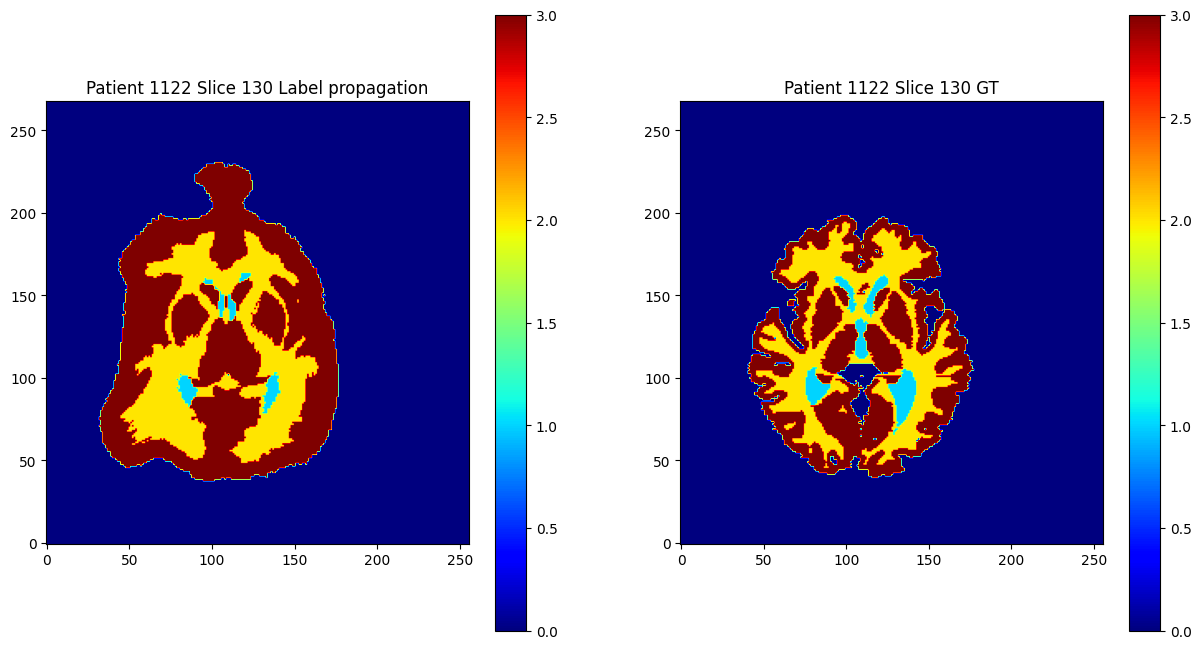

Patient 1122 Dice_label_CSF: 0.5451
Patient 1122 Dice_label_WM: 0.5978
Patient 1122 Dice_label_GM: 0.4252
Patient 1122 Average_Dice: 0.5227




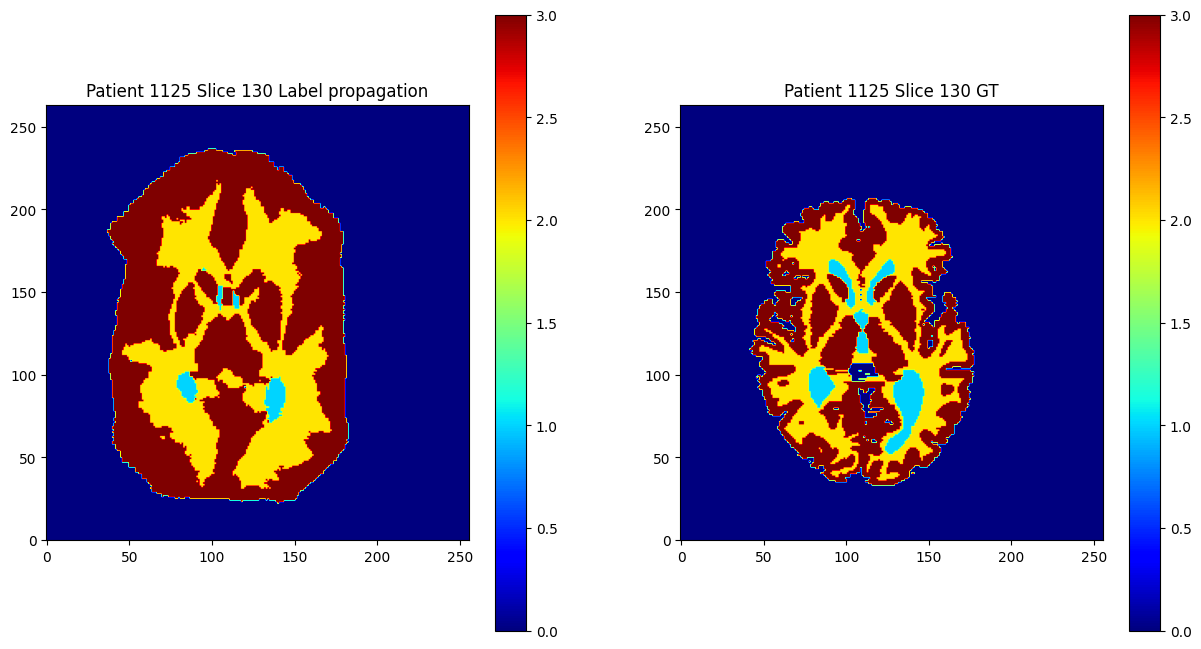

Patient 1125 Dice_label_CSF: 0.6240
Patient 1125 Dice_label_WM: 0.6391
Patient 1125 Dice_label_GM: 0.3632
Patient 1125 Average_Dice: 0.5421




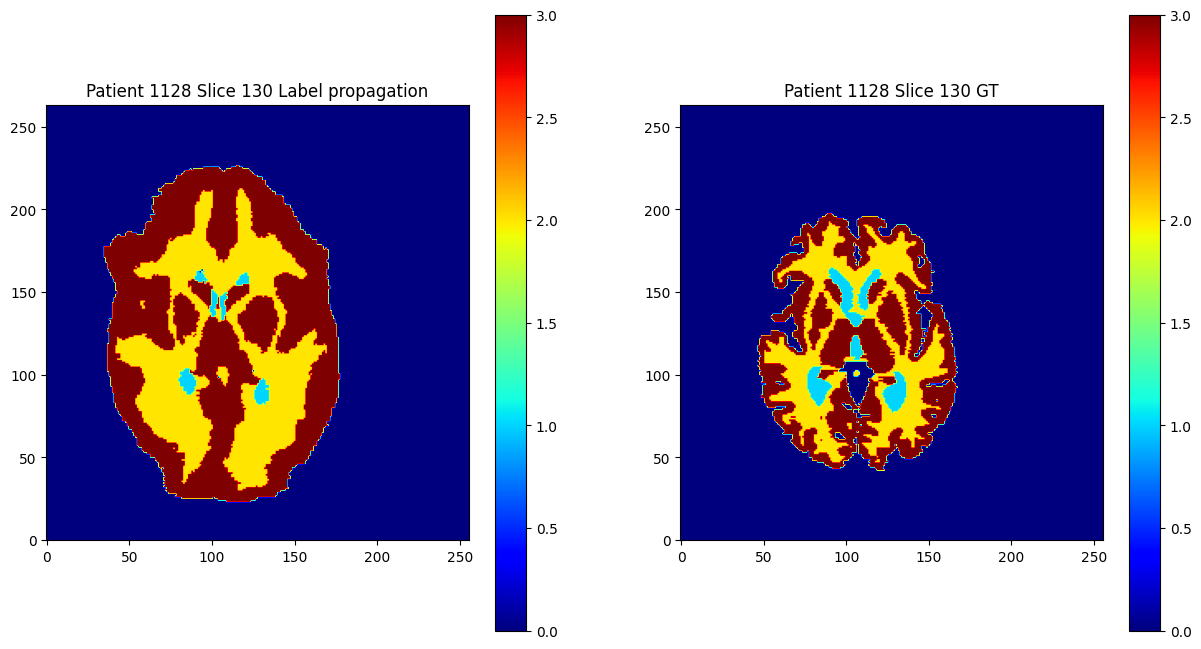

Patient 1128 Dice_label_CSF: 0.5104
Patient 1128 Dice_label_WM: 0.5799
Patient 1128 Dice_label_GM: 0.2979
Patient 1128 Average_Dice: 0.4628




In [77]:
for f in test_images:
    num = f.split("/")[-1].split(".")[0]
    test_image_path = fr"C:\Users\User\Desktop\UDG_old_pc\UDG\Subjects\MISSSSSA\Atlas_part2\test-set\testing-images\{num}.nii.gz".replace("\\","/")
    csf_prob_map_path = fr"C:\Users\User\Desktop\UDG_old_pc\UDG\Subjects\MISSSSSA\Atlas_part2\Code\Outputs_MNI\MapsNonRigid\{num}.nii\CSF_NonRigid_final_transformed_{num}.nii.nii".replace("\\","/")
    wm_prob_map_path = fr"C:\Users\User\Desktop\UDG_old_pc\UDG\Subjects\MISSSSSA\Atlas_part2\Code\Outputs_MNI\MapsNonRigid\{num}.nii\WM_NonRigid_final_transformed_{num}.nii.nii".replace("\\","/")
    gm_prob_map_path = fr"C:\Users\User\Desktop\UDG_old_pc\UDG\Subjects\MISSSSSA\Atlas_part2\Code\Outputs_MNI\MapsNonRigid\{num}.nii\GM_NonRigid_final_transformed_{num}.nii.nii".replace("\\","/")

    #Load test image
    test_image, affine = load_image(test_image_path)

    #Prob maps
    csf_prob_map, _ = load_image(csf_prob_map_path)
    wm_prob_map, _ = load_image(wm_prob_map_path)
    gm_prob_map, _ = load_image(gm_prob_map_path)

    label_image = create_label_image(csf_prob_map, wm_prob_map, gm_prob_map).astype(np.float32)
    output_path = fr"C:\Users\User\Desktop\UDG_old_pc\UDG\Subjects\MISSSSSA\Atlas_part2\Code\Label_prop_nonrigid\Label_prop_nonrigid_{num}".replace("\\", "/")
    save_label_image(label_image, affine, output_path)

    segmentation_path = fr"C:\Users\User\Desktop\UDG_old_pc\UDG\Subjects\MISSSSSA\Atlas_part2\Code\Label_prop_nonrigid\Label_prop_nonrigid_{num}.nii".replace("\\", "/")
    ground_truth_path = fr"C:\Users\User\Desktop\UDG_old_pc\UDG\Subjects\MISSSSSA\Atlas_part2\test-set\testing-labels\{num}_3C.nii.gz".replace("\\", "/")

    # Compute Dice scores
    segmentation_labels, gt_labels, dice_scores = compute_dice_scores(segmentation_path, ground_truth_path)

    slice_num = 130  # Taking a middle slice
    slice_data_labels = segmentation_labels[:, :, slice_num]
    slice_data_gt = gt_labels[:, :, slice_num]

    # Plot the slice
    plt.figure(figsize=(15, 8))
    plt.subplot(1,2,1)
    plt.imshow(slice_data_labels.T, cmap='jet', origin='lower')
    plt.colorbar()
    plt.title(f'Patient {num} Slice {slice_num} Label propagation')

    plt.subplot(1,2,2)
    plt.imshow(slice_data_gt.T, cmap='jet', origin='lower')
    plt.colorbar()
    plt.title(f'Patient {num} Slice {slice_num} GT')
    plt.show()
    # Print Dice scores
    for label, score in dice_scores.items():
        print(f'Patient {num} {label}: {score:.4f}')  
    
    print("\n")

# Label prop with mask

In [ ]:
def create_label_image_mask(csf_map, wm_map, gm_map, mask=None):
    """
    Create a label image based on the highest probability for each tissue type
    (CSF, WM, GM). Optionally, restrict labeling to regions defined by a mask.
    
    :param csf_map: CSF probability map
    :param wm_map: WM probability map
    :param gm_map: GM probability map
    :param mask: Optional binary mask where 1 indicates areas to label
    :return: Labeled image
    """
    label_image = np.zeros(csf_map.shape, dtype=np.int32)
    
    # Only perform labeling within the mask if provided
    if mask is not None:
        label_image[(csf_map > wm_map) & (csf_map > gm_map) & mask] = 1  # CSF
        label_image[(wm_map > csf_map) & (wm_map > gm_map) & mask] = 2   # WM
        label_image[(gm_map > csf_map) & (gm_map > wm_map) & mask] = 3   # GM
    else:
        label_image[(csf_map > wm_map) & (csf_map > gm_map)] = 1  # CSF
        label_image[(wm_map > csf_map) & (wm_map > gm_map)] = 2   # WM
        label_image[(gm_map > csf_map) & (gm_map > wm_map)] = 3   # GM
    
    return label_image

for f in test_images:
    
    num = f.split("/")[-1].split(".")[0]
    test_image_path = fr"C:\Users\User\Desktop\UDG_old_pc\UDG\Subjects\MISSSSSA\Atlas_part2\test-set\testing-images\{num}.nii.gz".replace("\\","/")
    test_image_mask_path = fr"C:\Users\User\Desktop\UDG_old_pc\UDG\Subjects\MISSSSSA\Atlas_part2\test-set\testing-mask\{num}_1C.nii.gz".replace("\\","/")
    csf_prob_map_path = fr"C:\Users\User\Desktop\UDG_old_pc\UDG\Subjects\MISSSSSA\Atlas_part2\Code\Outputs_MNI\MapsNonRigid\{num}.nii\CSF_NonRigid_final_transformed_{num}.nii.nii".replace("\\","/")
    wm_prob_map_path = fr"C:\Users\User\Desktop\UDG_old_pc\UDG\Subjects\MISSSSSA\Atlas_part2\Code\Outputs_MNI\MapsNonRigid\{num}.nii\WM_NonRigid_final_transformed_{num}.nii.nii".replace("\\","/")
    gm_prob_map_path = fr"C:\Users\User\Desktop\UDG_old_pc\UDG\Subjects\MISSSSSA\Atlas_part2\Code\Outputs_MNI\MapsNonRigid\{num}.nii\GM_NonRigid_final_transformed_{num}.nii.nii".replace("\\","/")

    #Load test image
    test_image, affine = load_image(test_image_path)
    mask, _ = load_image(test_image_mask_path)
    mask = (mask > 0).astype(int)

    #Prob maps
    csf_prob_map, _ = load_image(csf_prob_map_path)
    wm_prob_map, _ = load_image(wm_prob_map_path)
    gm_prob_map, _ = load_image(gm_prob_map_path)

    label_image = create_label_image_mask(csf_prob_map, wm_prob_map, gm_prob_map, mask).astype(np.float32)
    output_path = fr"C:\Users\User\Desktop\UDG_old_pc\UDG\Subjects\MISSSSSA\Atlas_part2\Code\Label_prop_nonrigid_mask\Label_prop_nonrigid_mask_{num}".replace("\\", "/")
    save_label_image(label_image, affine, output_path)

    segmentation_path = fr"C:\Users\User\Desktop\UDG_old_pc\UDG\Subjects\MISSSSSA\Atlas_part2\Code\Label_prop_nonrigid_mask\Label_prop_nonrigid_mask_{num}.nii".replace("\\", "/")
    ground_truth_path = fr"C:\Users\User\Desktop\UDG_old_pc\UDG\Subjects\MISSSSSA\Atlas_part2\test-set\testing-labels\{num}_3C.nii.gz".replace("\\", "/")

    # Compute Dice scores
    segmentation_labels, gt_labels, dice_scores = compute_dice_scores(segmentation_path, ground_truth_path)

    slice_num = 130  # Taking a middle slice
    slice_data_labels = segmentation_labels[:, :, slice_num]
    slice_data_gt = gt_labels[:, :, slice_num]

    # Plot the slice
    plt.figure(figsize=(15, 8))
    plt.subplot(1,2,1)
    plt.imshow(slice_data_labels.T, cmap='jet', origin='lower')
    plt.colorbar()
    plt.title(f'Patient {num} Slice {slice_num} Label propagation')

    plt.subplot(1,2,2)
    plt.imshow(slice_data_gt.T, cmap='jet', origin='lower')
    plt.colorbar()
    plt.title(f'Patient {num} Slice {slice_num} GT')
    plt.show()
    # Print Dice scores
    for label, score in dice_scores.items():
        print(f'Patient {num} {label}: {score:.4f}')  
    
    print("\n")